In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
retail = pd.read_excel('/Users/skylark/Desktop/Misc/Machine Learning (Codes and Data Files)/Data/Online Retail.xlsx')

In [90]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [21]:
ret_new=retail[(retail.InvoiceDate>'2011-06-01')&(retail.InvoiceDate<'2011-11-30')]

In [29]:
11-ret_new.Month

209029    5
209030    5
209031    5
209032    5
209033    5
         ..
512925    0
512926    0
512927    0
512928    0
512929    0
Name: Month, Length: 303901, dtype: int64

In [27]:
ret_new.sample(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
284754,561885,21530,DAIRY MAID TOASTRACK,1,2011-07-31 13:13:00,0.79,15532.0,United Kingdom,7
431030,573585,23311,VINTAGE CHRISTMAS STOCKING,5,2011-10-31 14:41:00,4.96,NaN,United Kingdom,10
499066,578620,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,4,2011-11-24 15:21:00,2.95,17247.0,United Kingdom,11
353320,567796,22564,ALPHABET STENCIL CRAFT,2,2011-09-22 11:46:00,1.25,16395.0,United Kingdom,9
493652,578244,22507,MEMO BOARD RETROSPOT DESIGN,2,2011-11-23 12:36:00,4.95,15727.0,United Kingdom,11
273958,560872,23148,MINIATURE ANTIQUE ROSE HOOK IVORY,12,2011-07-21 14:41:00,0.83,14745.0,United Kingdom,7
280800,561502,23092,LARGE ANTIQUE WHITE PHOTO FRAME,2,2011-07-27 14:14:00,7.90,14305.0,United Kingdom,7


In [26]:
ret_new['Month'] = pd.DatetimeIndex(ret_new['InvoiceDate']).month

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
ret_new['Recency'] = 11-ret_new.Month

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
ret_new[ret_new.InvoiceNo=='A563185']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Recency
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,8,3


In [153]:
ret_new=ret_new[ret_new.Quantity>0]

In [156]:
ret=ret_new.reset_index()

In [169]:
ret.drop('index', axis=1, inplace=True)

In [180]:
ret['Monetary'] = ret.Quantity*ret.UnitPrice
ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Recency,Monetary
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,6,5,22.50
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,6,5,16.95
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,6,5,66.40
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,6,5,32.70
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,6,5,51.00
...,...,...,...,...,...,...,...,...,...,...,...
298186,579520,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom,11,0,0.39
298187,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom,11,0,0.29
298188,579520,22230,JIGSAW TREE WITH WATERING CAN,1,2011-11-29 18:14:00,0.29,12748.0,United Kingdom,11,0,0.29
298189,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748.0,United Kingdom,11,0,0.39


In [192]:
ret=ret[ret.Monetary<11062.06]

In [186]:
ret=ret[ret.Monetary>0]

In [193]:
ret.sample(10)

,Recency,Monetary,InvoiceNo
InvoiceNo,,,
562093,3,326.22,9
564161,3,241.09,12
557735,5,313.08,9
578954,0,133.68,47
573553,1,2534.37,145
560254,4,236.94,19
561031,4,307.80,5
576917,0,289.10,15
559110,4,594.00,1


In [194]:
ret['Frequency'] = ret['InvoiceNo']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
ret.drop('InvoiceNo', axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [198]:
ret

,Recency,Monetary,Frequency
InvoiceNo,,,
555156,5,39.45,2
555157,5,287.45,8
555158,5,1378.48,76
555159,5,90.75,9
555160,5,1799.60,13
...,...,...,...
579515,0,370.13,19
579516,0,775.22,158
579517,0,34.12,7


In [199]:
from sklearn.cluster import KMeans

In [200]:
from sklearn.preprocessing import StandardScaler
scaled_ret = StandardScaler().fit_transform(ret)
scaled_ret

array([[ 1.63058252, -0.57458372, -0.54946765],
       [ 1.63058252, -0.26346852, -0.41825797],
       [ 1.63058252,  1.1052251 ,  1.06878505],
       ...,
       [-1.22102429, -0.58127019, -0.44012625],
       [-1.22102429, -0.52594688, -0.26518002],
       [-1.22102429, -0.38988416,  0.43460493]])

In [202]:
error = []
for i in range(1,10):
    clust = KMeans(i)
    clust.fit(scaled_ret)
    error.append(clust.inertia_)

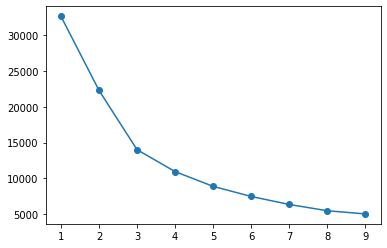

In [204]:
plt.plot(range(1,10), error, marker='o')

In [205]:
clust_ret = KMeans(3).fit(scaled_ret)
ret['ID'] = clust_ret.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
ret

,Recency,Monetary,Frequency,ID
InvoiceNo,,,,
555156,5,39.45,2,1
555157,5,287.45,8,1
555158,5,1378.48,76,1
555159,5,90.75,9,1
555160,5,1799.60,13,1
...,...,...,...,...
579515,0,370.13,19,0
579516,0,775.22,158,0
579517,0,34.12,7,0


In [207]:
clust_ret.cluster_centers_

array([[-0.72465868, -0.12941374, -0.09704652],
       [ 1.08649837, -0.15888722, -0.15621199],
       [-0.07142364,  3.88322717,  3.32116061]])

In [208]:
clust_ret2 = KMeans(4).fit(scaled_ret)
ret['ID_4'] = clust_ret2.labels_

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [216]:
ret[ret.ID==0]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
565080,2,40.00,2,0,0
565082,2,75.30,3,0,0
565083,2,334.46,11,0,0
565084,2,576.74,6,0,0
565086,2,52.50,1,0,0
...,...,...,...,...,...
579515,0,370.13,19,0,0
579516,0,775.22,158,0,0
579517,0,34.12,7,0,0


In [217]:
ret[ret.ID==1]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
555156,5,39.45,2,1,1
555157,5,287.45,8,1,1
555158,5,1378.48,76,1,1
555159,5,90.75,9,1,1
555160,5,1799.60,13,1,1
...,...,...,...,...,...
564995,3,263.30,45,1,1
565014,3,1724.80,15,1,1
565056,3,566.38,23,1,1


In [218]:
ret[ret.ID==2]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
555164,5,3623.20,13,2,2
555275,5,1742.39,218,2,3
555276,5,1496.98,176,2,3
555284,5,3056.72,105,2,2
555397,5,1986.12,211,2,3
...,...,...,...,...,...
579470,0,1079.27,194,2,3
579471,0,3063.88,166,2,3
579498,0,3651.60,1,2,2


In [219]:
ret[ret.ID_4==0]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
565080,2,40.00,2,0,0
565082,2,75.30,3,0,0
565083,2,334.46,11,0,0
565084,2,576.74,6,0,0
565086,2,52.50,1,0,0
...,...,...,...,...,...
579515,0,370.13,19,0,0
579516,0,775.22,158,0,0
579517,0,34.12,7,0,0


In [220]:
ret[ret.ID_4==1]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
555156,5,39.45,2,1,1
555157,5,287.45,8,1,1
555158,5,1378.48,76,1,1
555159,5,90.75,9,1,1
555160,5,1799.60,13,1,1
...,...,...,...,...,...
564995,3,263.30,45,1,1
565014,3,1724.80,15,1,1
565056,3,566.38,23,1,1


In [221]:
ret[ret.ID_4==2]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
555164,5,3623.20,13,2,2
555284,5,3056.72,105,2,2
555400,5,5913.90,68,2,2
555920,5,10999.52,12,2,2
556080,5,4801.22,93,2,2
...,...,...,...,...,...
578940,0,3310.12,71,2,2
579251,0,3821.36,3,2,2
579284,0,3337.44,21,2,2


In [222]:
ret[ret.ID_4==3]

,Recency,Monetary,Frequency,ID,ID_4
InvoiceNo,,,,,
555275,5,1742.39,218,2,3
555276,5,1496.98,176,2,3
555397,5,1986.12,211,2,3
555510,5,1776.90,183,2,3
556108,5,1698.38,220,2,3
...,...,...,...,...,...
579297,0,5402.23,238,2,3
579470,0,1079.27,194,2,3
579471,0,3063.88,166,2,3
